<h2> Analysis of Dietary Health in MrOS V1 Data (EDA3-V1-DH.ipynb) </h2> 

The purpose of this workbook is take begin exploring the vast amount of data that we have.  Through various methods of exploration, we hope to find general trends, patterns, and correlations in the data that will help lead to us a reliable predictive model. 

#### 1. [Installation and Importing of Libraries](#eda_import)
#### 2. [Retreival of Data](#eda_retrieval)
#### 3. [Exploration of NA Values](#eda_na)
#### 4. [Descriptive Statistics](#eda_describe)

### <a name="eda_import"></a>Installation and Importing of Libraries
In order to both explore and visualize the data, it's necessary for us to load various libraries.  In addition to loading already pre-installed libraries, we've also had to install seaborn for plotting. 

In [1]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.7/site-packages (0.12.2)


In [2]:
##import libraries required for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer


In [3]:
sns.__version__

'0.12.2'

### <a name="eda_retrieval"></a>Retreival of Data
The data needs to be retrieved from the Postgres database and stored in a dataframe for us to begin analyzing.


In [4]:
##Connect to Postgre
import psycopg2
import sqlalchemy
import getpass
import pandas as pd 

user = "hallty"
host = "pgsql.dsa.lan"
database = "casestdysu23t03"
password = getpass.getpass()
connectionstring = "postgresql://" + user + ":" + password + "@" + host + "/" + database
engine = sqlalchemy.create_engine(connectionstring)
connection = None

try:
    connection = engine.connect()
except Exception as err:
    print("An error has occurred trying to connect: {}".format(err))

del password

········


In [5]:
query = "SELECT * FROM public.v1_form_dh"
dh = pd.read_sql_query(query, con=connection)

In [6]:
print(dh['ID'].dtype)
print(dh.head())

object
       ID  DHDIET  DHLFAT  DHLCHOL  DHLCARB  DHLSALT  DHHPROT  DHHFIBER  \
0  BI0001     1.0     1.0      0.0      0.0      0.0      0.0       0.0   
1  BI0002     0.0     NaN      NaN      NaN      NaN      NaN       NaN   
2  BI0003     0.0     NaN      NaN      NaN      NaN      NaN       NaN   
3  BI0004     0.0     NaN      NaN      NaN      NaN      NaN       NaN   
4  BI0005     0.0     NaN      NaN      NaN      NaN      NaN       NaN   

   DHLFIBER  DHPOTASS  DHWEIGHT  DHLQGAIN  DHLQLOSE  DHDIABD  DHVEG  DHOTHER  \
0       0.0       0.0       0.0       0.0       0.0      0.0    0.0      0.0   
1       NaN       NaN       NaN       NaN       NaN      NaN    NaN      NaN   
2       NaN       NaN       NaN       NaN       NaN      NaN    NaN      NaN   
3       NaN       NaN       NaN       NaN       NaN      NaN    NaN      NaN   
4       NaN       NaN       NaN       NaN       NaN      NaN    NaN      NaN   

    DH  
0  1.0  
1  1.0  
2  1.0  
3  1.0  
4  1.0  


## Our diet health dataset comes one-hot encoded. 0 for 'no' and 1 for 'yes'. Let's go ahead and map some names for interpretibility. 

In [7]:
# Create a dictionary mapping old names to new names
name_mapping = {
    'DHDIET': 'AnyDiet',
    'DHLFAT': 'LowFat',
    'DHLCHOL': 'LowCholesterol',
    'DHLCARB': 'LowCarb',
    'DHLSALT': 'LowSalt',
    'DHHPROT': 'HighProtein',
    'DHHFIBER': 'HighFiber',
    'DHLFIBER': 'LowFiber',
    'DHPOTASS': 'Potassium',
    'DHWEIGHT': 'Weight',
    'DHLQGAIN': 'GainWeight',
    'DHLQLOSE': 'LoseWeight',
    'DHDIABD': 'DiabetesDiet',
    'DHVEG': 'Vegetarian',
    'DHOTHER': 'Other'
}

# Rename columns
dh.rename(columns=name_mapping, inplace=True)


In [8]:
dh

,ID,AnyDiet,LowFat,LowCholesterol,LowCarb,LowSalt,HighProtein,HighFiber,LowFiber,Potassium,Weight,GainWeight,LoseWeight,DiabetesDiet,Vegetarian,Other,DH
0,BI0001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,BI0002,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,BI0003,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,BI0004,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,BI0005,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,SD9014,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5990,SD9015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5991,SD9016,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5992,SD9017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### <a name="eda_na"></a>Exploration of NA Values
Lot of NaN values in our dataset. The form reads "Have you been on a special diet in the past year?". If AnyDiet was recorded with 0 or 'no', then the rest of columns were left as NaN. Subsequent NaNs can be treated as 0 for our purpose here (as in they were not on a low carb diet if they did not put "Yes").

In [9]:
pd.set_option('display.max_rows', None)
print(pd.DataFrame(dh.isna().sum(), columns=['Missing Values']))
pd.reset_option('display.max_rows')

                Missing Values
ID                           0
AnyDiet                      0
LowFat                    4353
LowCholesterol            4353
LowCarb                   4353
LowSalt                   4353
HighProtein               4353
HighFiber                 4353
LowFiber                  4353
Potassium                 4353
Weight                    4353
GainWeight                4353
LoseWeight                4353
DiabetesDiet              4353
Vegetarian                4353
Other                     4353
DH                           0


In [10]:
num_nan = dh['AnyDiet'].isna().sum()
print(f"The number of NaNs in AnyDiet is: {num_nan}")
dh = dh.fillna(0)
#dropping the final column, termed DH. Which is 1 for every row and is placeholder for completed form. 
dh = dh.drop(['DH'], axis=1)

dh.head()

The number of NaNs in AnyDiet is: 0


,ID,AnyDiet,LowFat,LowCholesterol,LowCarb,LowSalt,HighProtein,HighFiber,LowFiber,Potassium,Weight,GainWeight,LoseWeight,DiabetesDiet,Vegetarian,Other
0,BI0001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BI0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BI0003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BI0004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BI0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a name="eda_describe"></a><h3> Descriptive Statistics </h3>
Below are a set of descriptive statistics meant to familiarize the audience

In [11]:
dh.describe().T

,count,mean,std,min,25%,50%,75%,max
AnyDiet,5994.0,0.273774,0.445931,0.0,0.0,0.0,1.0,1.0
LowFat,5994.0,0.154321,0.361286,0.0,0.0,0.0,0.0,1.0
LowCholesterol,5994.0,0.134635,0.341361,0.0,0.0,0.0,0.0,1.0
LowCarb,5994.0,0.030697,0.172511,0.0,0.0,0.0,0.0,1.0
LowSalt,5994.0,0.094261,0.292216,0.0,0.0,0.0,0.0,1.0
HighProtein,5994.0,0.012346,0.110432,0.0,0.0,0.0,0.0,1.0
HighFiber,5994.0,0.050050,0.218066,0.0,0.0,0.0,0.0,1.0
LowFiber,5994.0,0.001502,0.038723,0.0,0.0,0.0,0.0,1.0
Potassium,5994.0,0.006840,0.082429,0.0,0.0,0.0,0.0,1.0
Weight,5994.0,0.038539,0.192508,0.0,0.0,0.0,0.0,1.0


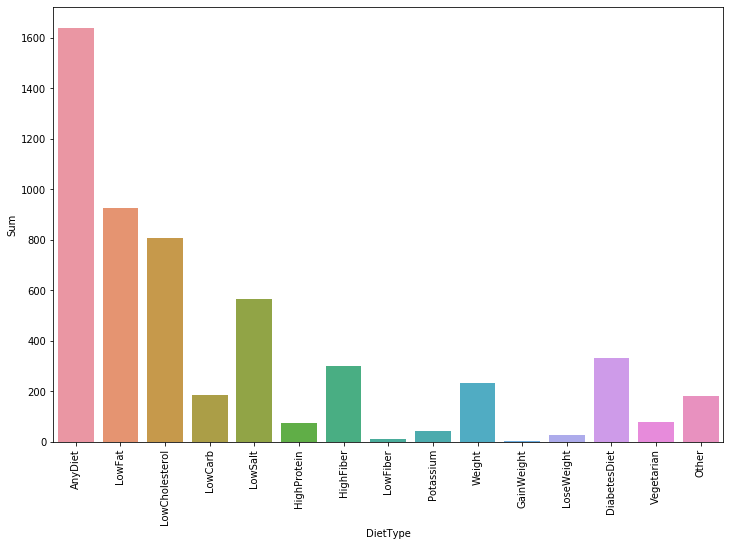

In [12]:
# Get columns except 'ID'
diet_columns = [col for col in dh.columns if col != 'ID']

# Sum these columns
diet_sums = dh[diet_columns].sum()

# Convert Series to DataFrame for Seaborn
diet_sums = diet_sums.reset_index()
diet_sums.columns = ['DietType', 'Sum']

# Create bar plot
plt.figure(figsize=(12,8))
sns.barplot(x='DietType', y='Sum', data=diet_sums)

# Rotate x labels for readability if you have many columns
plt.xticks(rotation=90)

plt.show()


In [13]:
for column in dh.columns:
    if column.startswith('DH'):
        # Count the number of 1.0 values and divide by the total 
        percent_ones = (dh[column] == 1.0).sum() / dh[column].count() * 100
        print(f"Percentage of 1.0s in {column}: {percent_ones:.2f}%")


Percentage of participants on AnyDiet: 27.38%
Percentage of participants on LowFat: 15.43%
Percentage of participants on LowCholesterol: 13.46%
Percentage of participants on LowCarb: 3.07%
Percentage of participants on LowSalt: 9.43%
Percentage of participants on HighProtein: 1.23%
Percentage of participants on HighFiber: 5.01%
Percentage of participants on LowFiber: 0.15%
Percentage of participants on Potassium: 0.68%
Percentage of participants on Weight: 3.85%
Percentage of participants on GainWeight: 0.03%
Percentage of participants on LoseWeight: 0.47%
Percentage of participants on DiabetesDiet: 5.52%
Percentage of participants on Vegetarian: 1.32%
Percentage of participants on Other: 2.99%


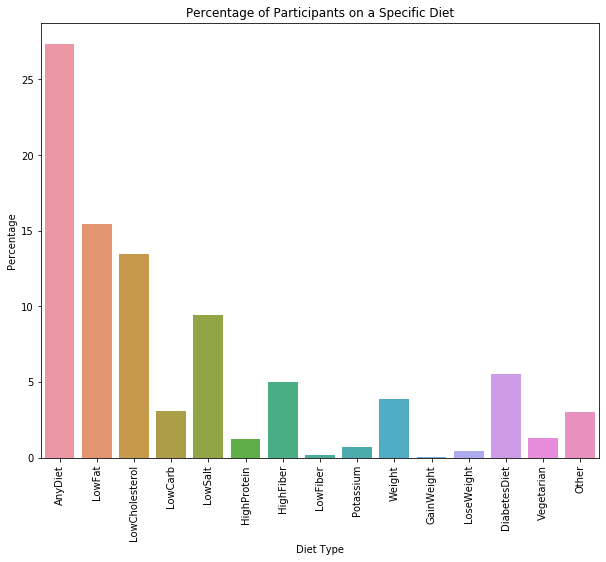

In [14]:
# Create an empty dictionary to store percentages
percentage_dict = {}

# Calculate percentages
for column in dh.columns:
    if column != 'ID':
        percent_ones = (dh[column] == 1.0).sum() / dh[column].count() * 100
        percentage_dict[column] = percent_ones
        print(f"Percentage of participants on {column}: {percent_ones:.2f}%")

# Convert the dictionary to a DataFrame for seaborn
percentage_df = pd.DataFrame(list(percentage_dict.items()), columns=['Diet Type', 'Percentage'])

# Plot using seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Diet Type', y='Percentage', data=percentage_df)
plt.title('Percentage of Participants on a Specific Diet')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


Since all answers are either were or were not on a special diet, we used a barplot to show the number of people from our dataset on each kind of diet. Our diet history shows, of 5994 men, 27.38% are on a special diet. That breaks down to type of diet. 15.43% of participants are on a low fat diet, 13.46% are on a low cholesterol diet, 9.43% on low salt diet, and 5.52% on diabetic diet. 